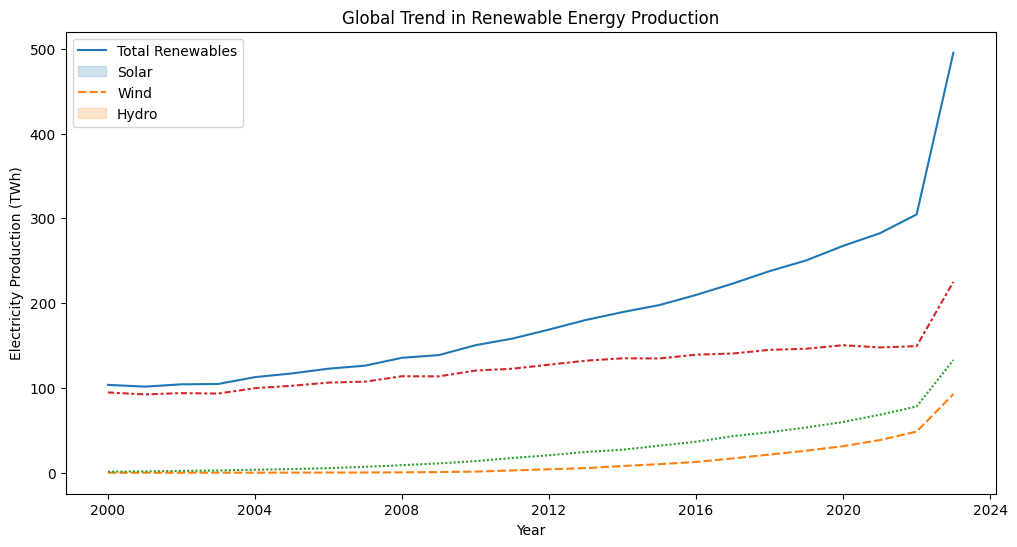

C:\Users\stefa\AppData\Local\Temp\ipykernel_5904\2955626276.py:43: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(pd.date_range(start=global_trend.index[-1], periods=11, freq='Y')[1:], future_predictions, label='Predicted Trend')


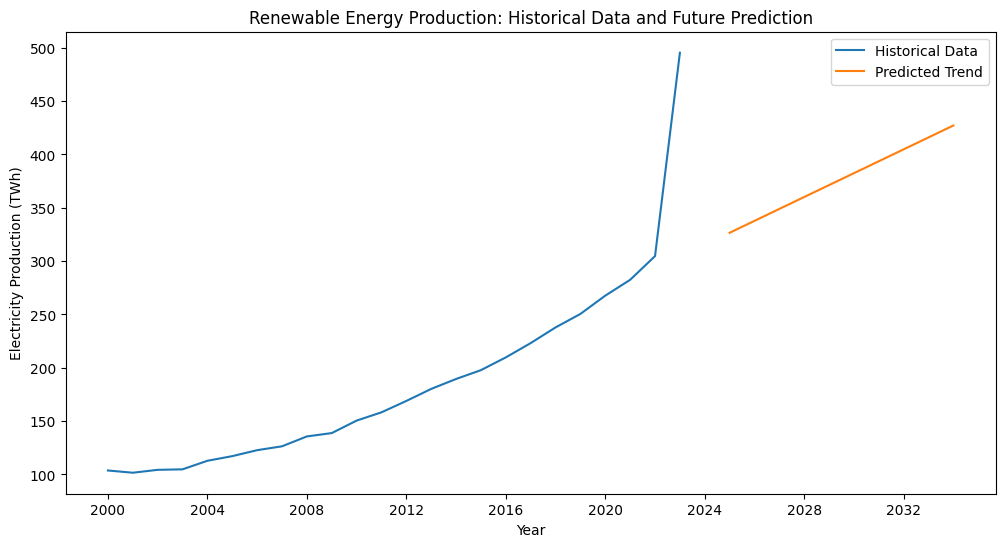

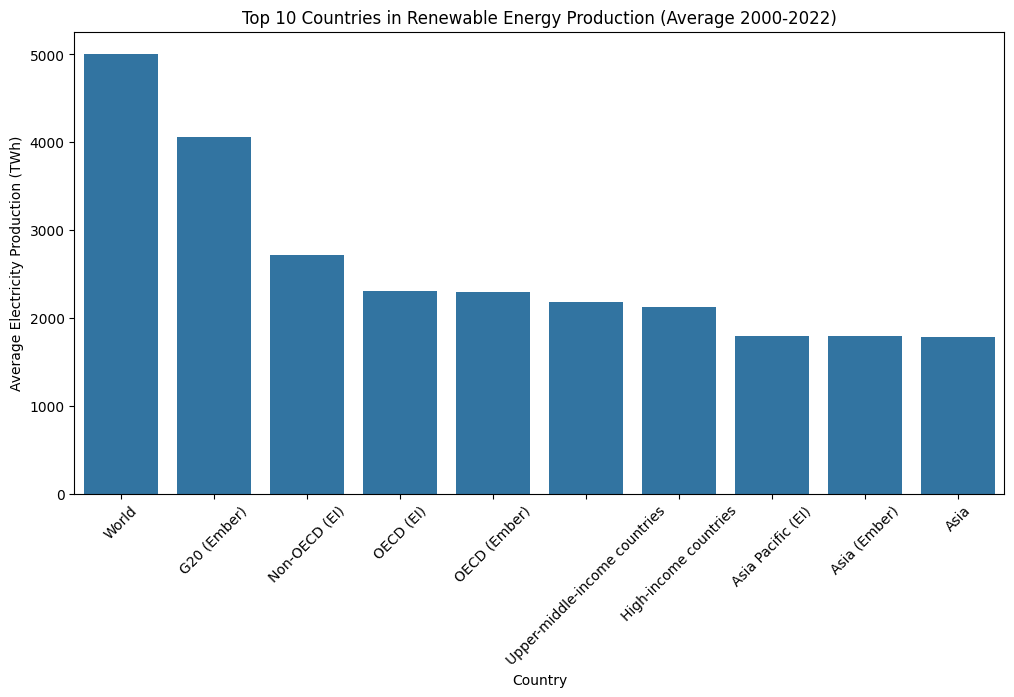

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv"
df = pd.read_csv(url)

# Clean and prepare the data
df['year'] = pd.to_datetime(df['year'], format='%Y')
df = df.sort_values('year')

# Select relevant columns and filter for recent years
renewable_cols = ['year', 'country', 'renewables_electricity', 'solar_electricity', 'wind_electricity', 'hydro_electricity']
recent_data = df[df['year'].dt.year >= 2000][renewable_cols].dropna()

# Global trend analysis
global_trend = recent_data.groupby('year')[['renewables_electricity', 'solar_electricity', 'wind_electricity', 'hydro_electricity']].mean()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_trend)
plt.title('Global Trend in Renewable Energy Production')
plt.xlabel('Year')
plt.ylabel('Electricity Production (TWh)')
plt.legend(['Total Renewables', 'Solar', 'Wind', 'Hydro'])
plt.show()

# Linear regression for future prediction
X = np.array(range(len(global_trend))).reshape(-1, 1)
y = global_trend['renewables_electricity'].values

model = LinearRegression()
model.fit(X, y)

future_years = np.array(range(len(global_trend), len(global_trend) + 10)).reshape(-1, 1)
future_predictions = model.predict(future_years)

plt.figure(figsize=(12, 6))
plt.plot(global_trend.index, global_trend['renewables_electricity'], label='Historical Data')
plt.plot(pd.date_range(start=global_trend.index[-1], periods=11, freq='Y')[1:], future_predictions, label='Predicted Trend')
plt.title('Renewable Energy Production: Historical Data and Future Prediction')
plt.xlabel('Year')
plt.ylabel('Electricity Production (TWh)')
plt.legend()
plt.show()

# Country comparison
top_countries = recent_data.groupby('country')['renewables_electricity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries in Renewable Energy Production (Average 2000-2022)')
plt.xlabel('Country')
plt.ylabel('Average Electricity Production (TWh)')
plt.xticks(rotation=45)
plt.show()

In [10]:
df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
3395,Burundi,1900-01-01,BDI,1627830.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1453,Asia and Oceania (Shift),1900-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10823,Libya,1900-01-01,LBY,514376.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12235,Middle East (Shift),1900-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13371,New Zealand,1900-01-01,NZL,809099.0,5.528757e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,Equatorial Guinea,2023-01-01,GNQ,1714674.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3227,Brunei,2023-01-01,BRN,452536.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13987,Non-OPEC (EI),2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18073,South and Central America (EI),2023-01-01,NaN,NaN,NaN,9.049,25.068,NaN,302.082,NaN,...,5.638,2.469,13.844,41.266,348.531,NaN,134.171,NaN,9.161,4.012


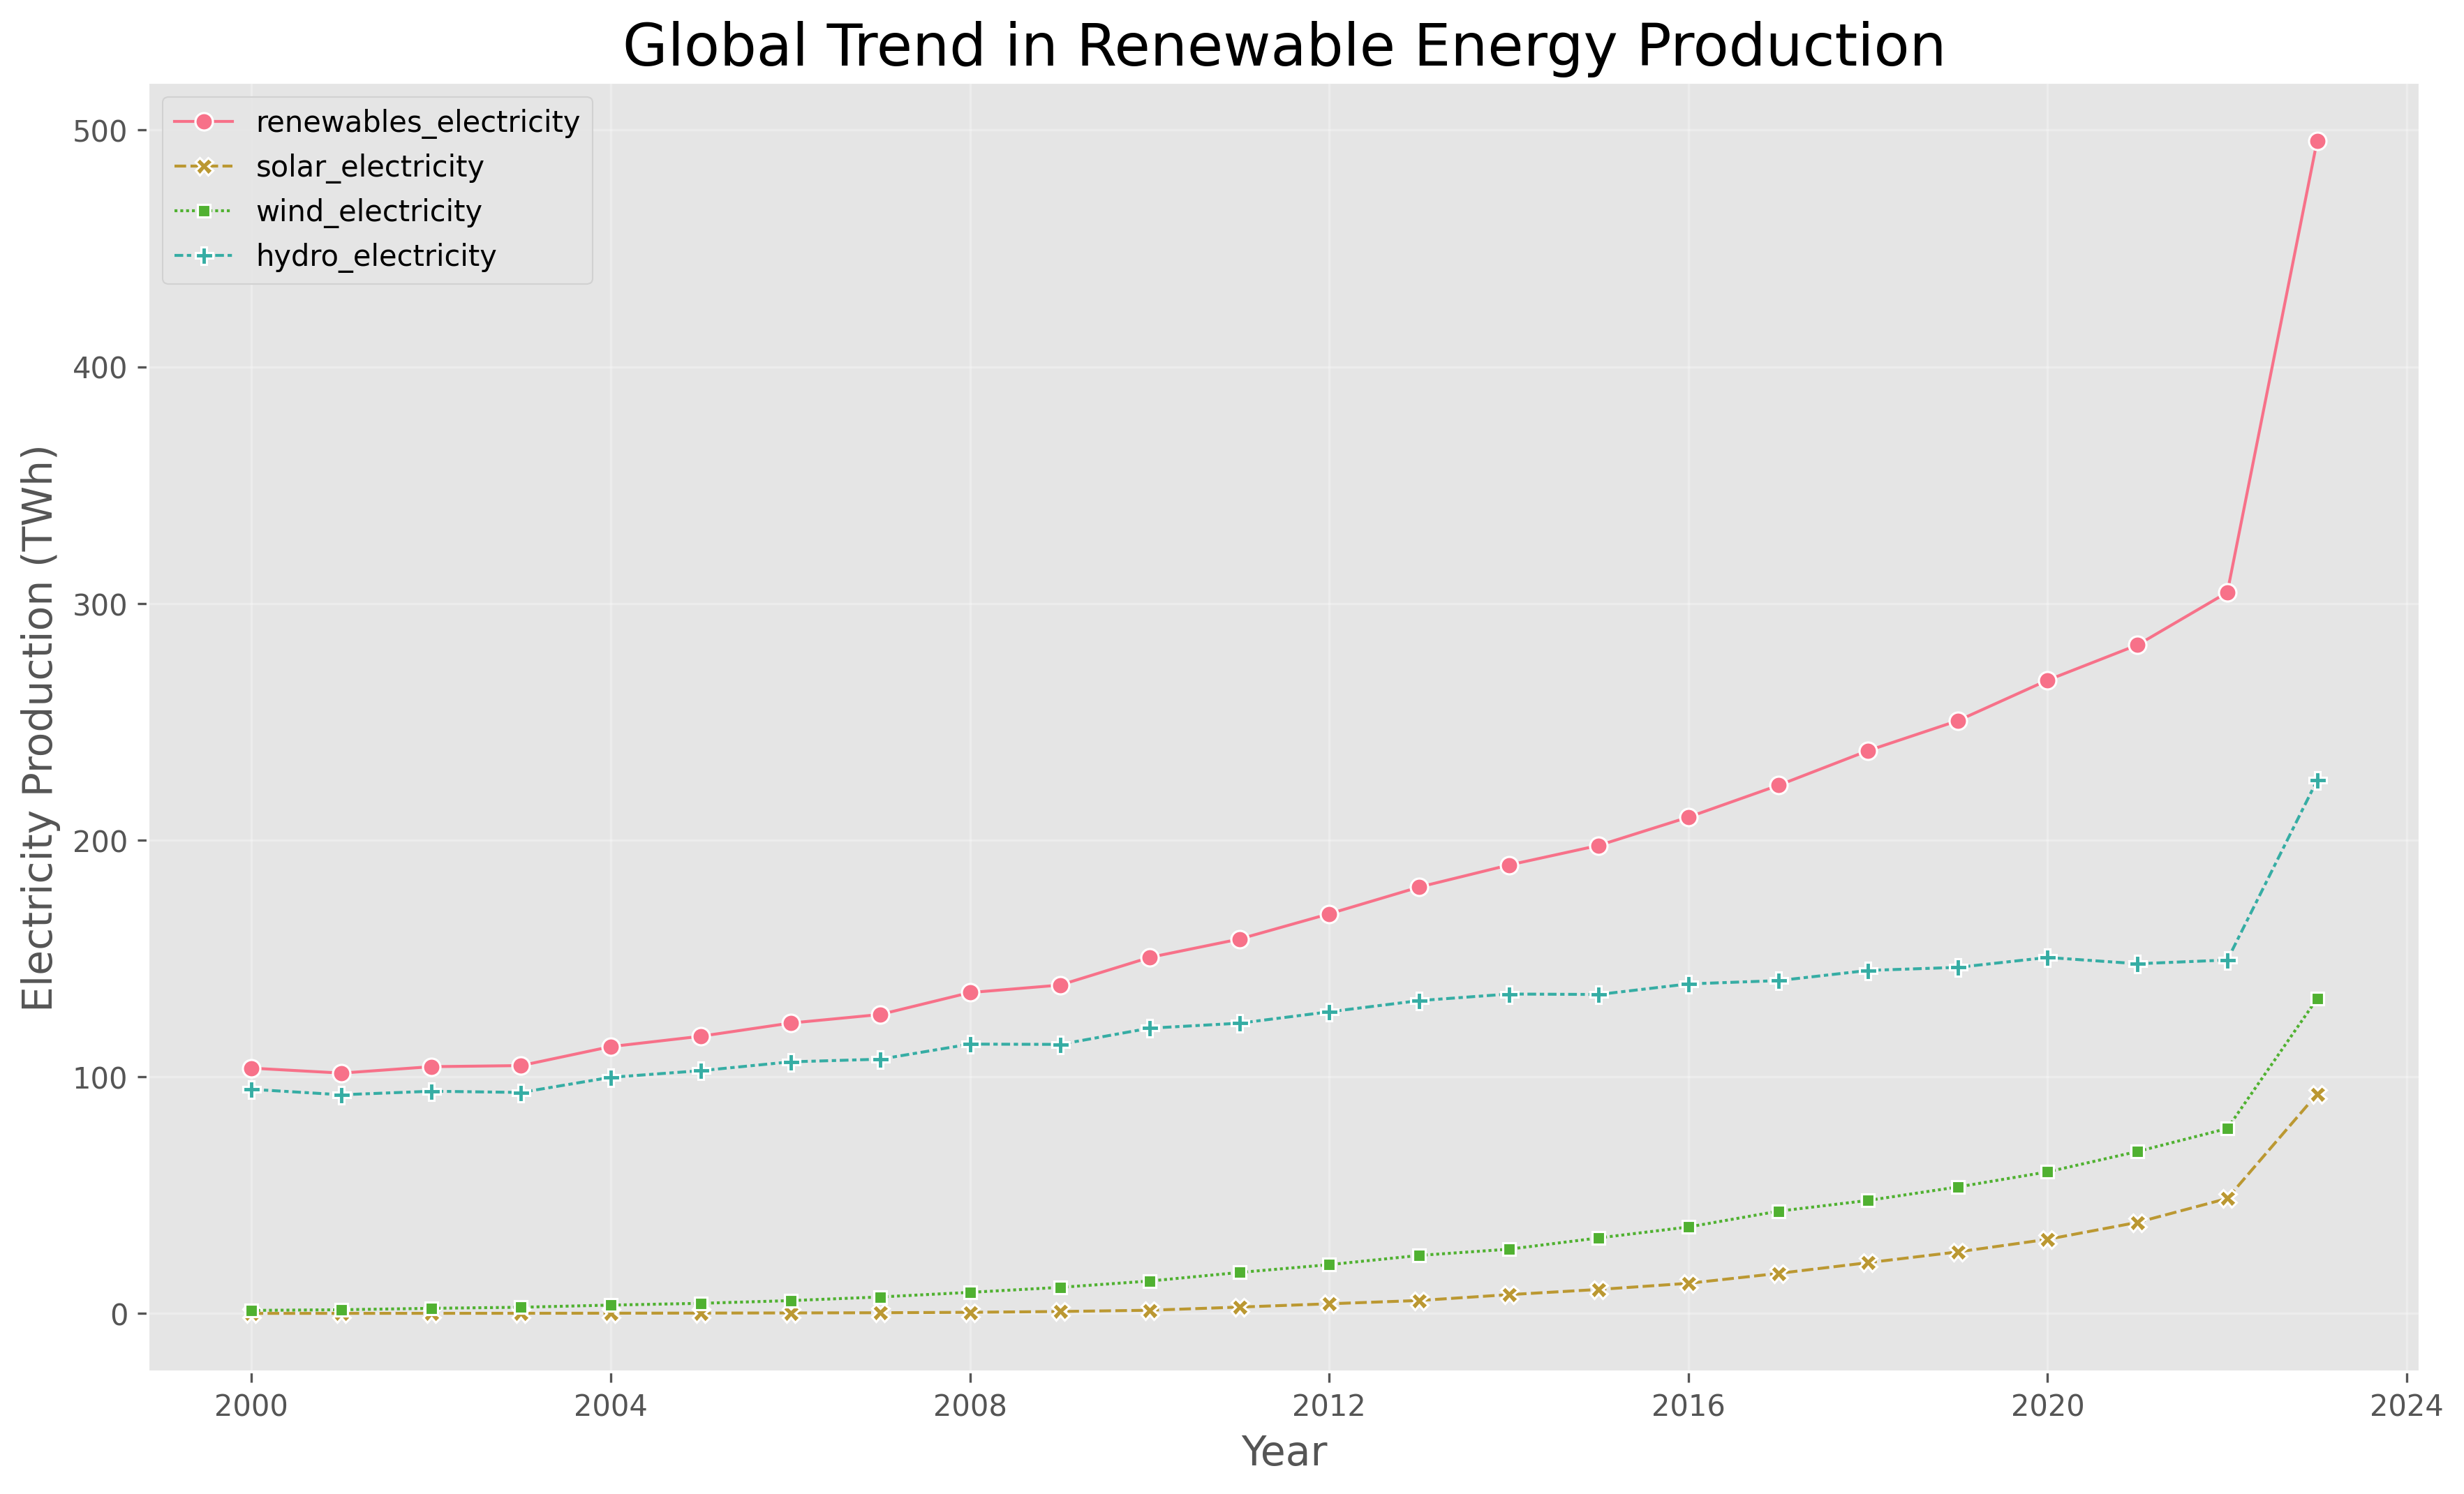

<Axes: xlabel='year'>

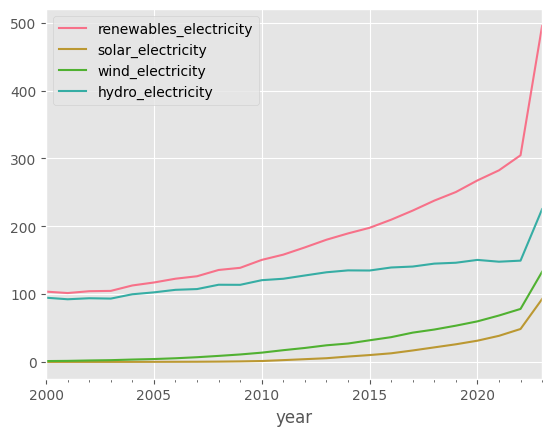

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geodatasets
import numpy as np

# Set the style for all plots
plt.style.use('ggplot')
sns.set_palette("husl")

# Load the dataset
url = "https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv"
df = pd.read_csv(url)

# Clean and prepare the data
df['year'] = pd.to_datetime(df['year'], format='%Y')
df = df.sort_values('year')

# Select relevant columns and filter for recent years
renewable_cols = ['year', 'country', 'renewables_electricity', 'solar_electricity', 'wind_electricity', 'hydro_electricity']
recent_data = df[df['year'].dt.year >= 2000][renewable_cols].dropna()

# Global trend analysis
global_trend = recent_data.groupby('year')[['renewables_electricity', 'solar_electricity', 'wind_electricity', 'hydro_electricity']].mean()

# 1. More fancy plots (seaborn style with alpha)
plt.figure(figsize=(14, 8), dpi=300)
sns.lineplot(data=global_trend, linewidth=1, alpha=1, markers=True)
plt.title('Global Trend in Renewable Energy Production', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Electricity Production (TWh)', fontsize=14)
# plt.legend(['Total Renewables', 'Solar', 'Wind', 'Hydro', ''], fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('global_trend.png', dpi=300, bbox_inches='tight')
plt.show()
global_trend.plot()

In [69]:
global_trend

,renewables_electricity,solar_electricity,wind_electricity,hydro_electricity
year,,,,
2000-01-01,103.657725,0.041799,1.295467,94.705541
2001-01-01,101.566037,0.056490,1.586938,92.404181
2002-01-01,104.281947,0.070975,2.184383,93.906897
2003-01-01,104.736992,0.087418,2.629373,93.392098
2004-01-01,112.758656,0.116365,3.543320,99.781844
2005-01-01,117.128502,0.166918,4.292678,102.582155
2006-01-01,122.702033,0.231008,5.437073,106.318249
2007-01-01,126.331555,0.311453,6.984645,107.441890
2008-01-01,135.588608,0.504604,8.927090,113.808024


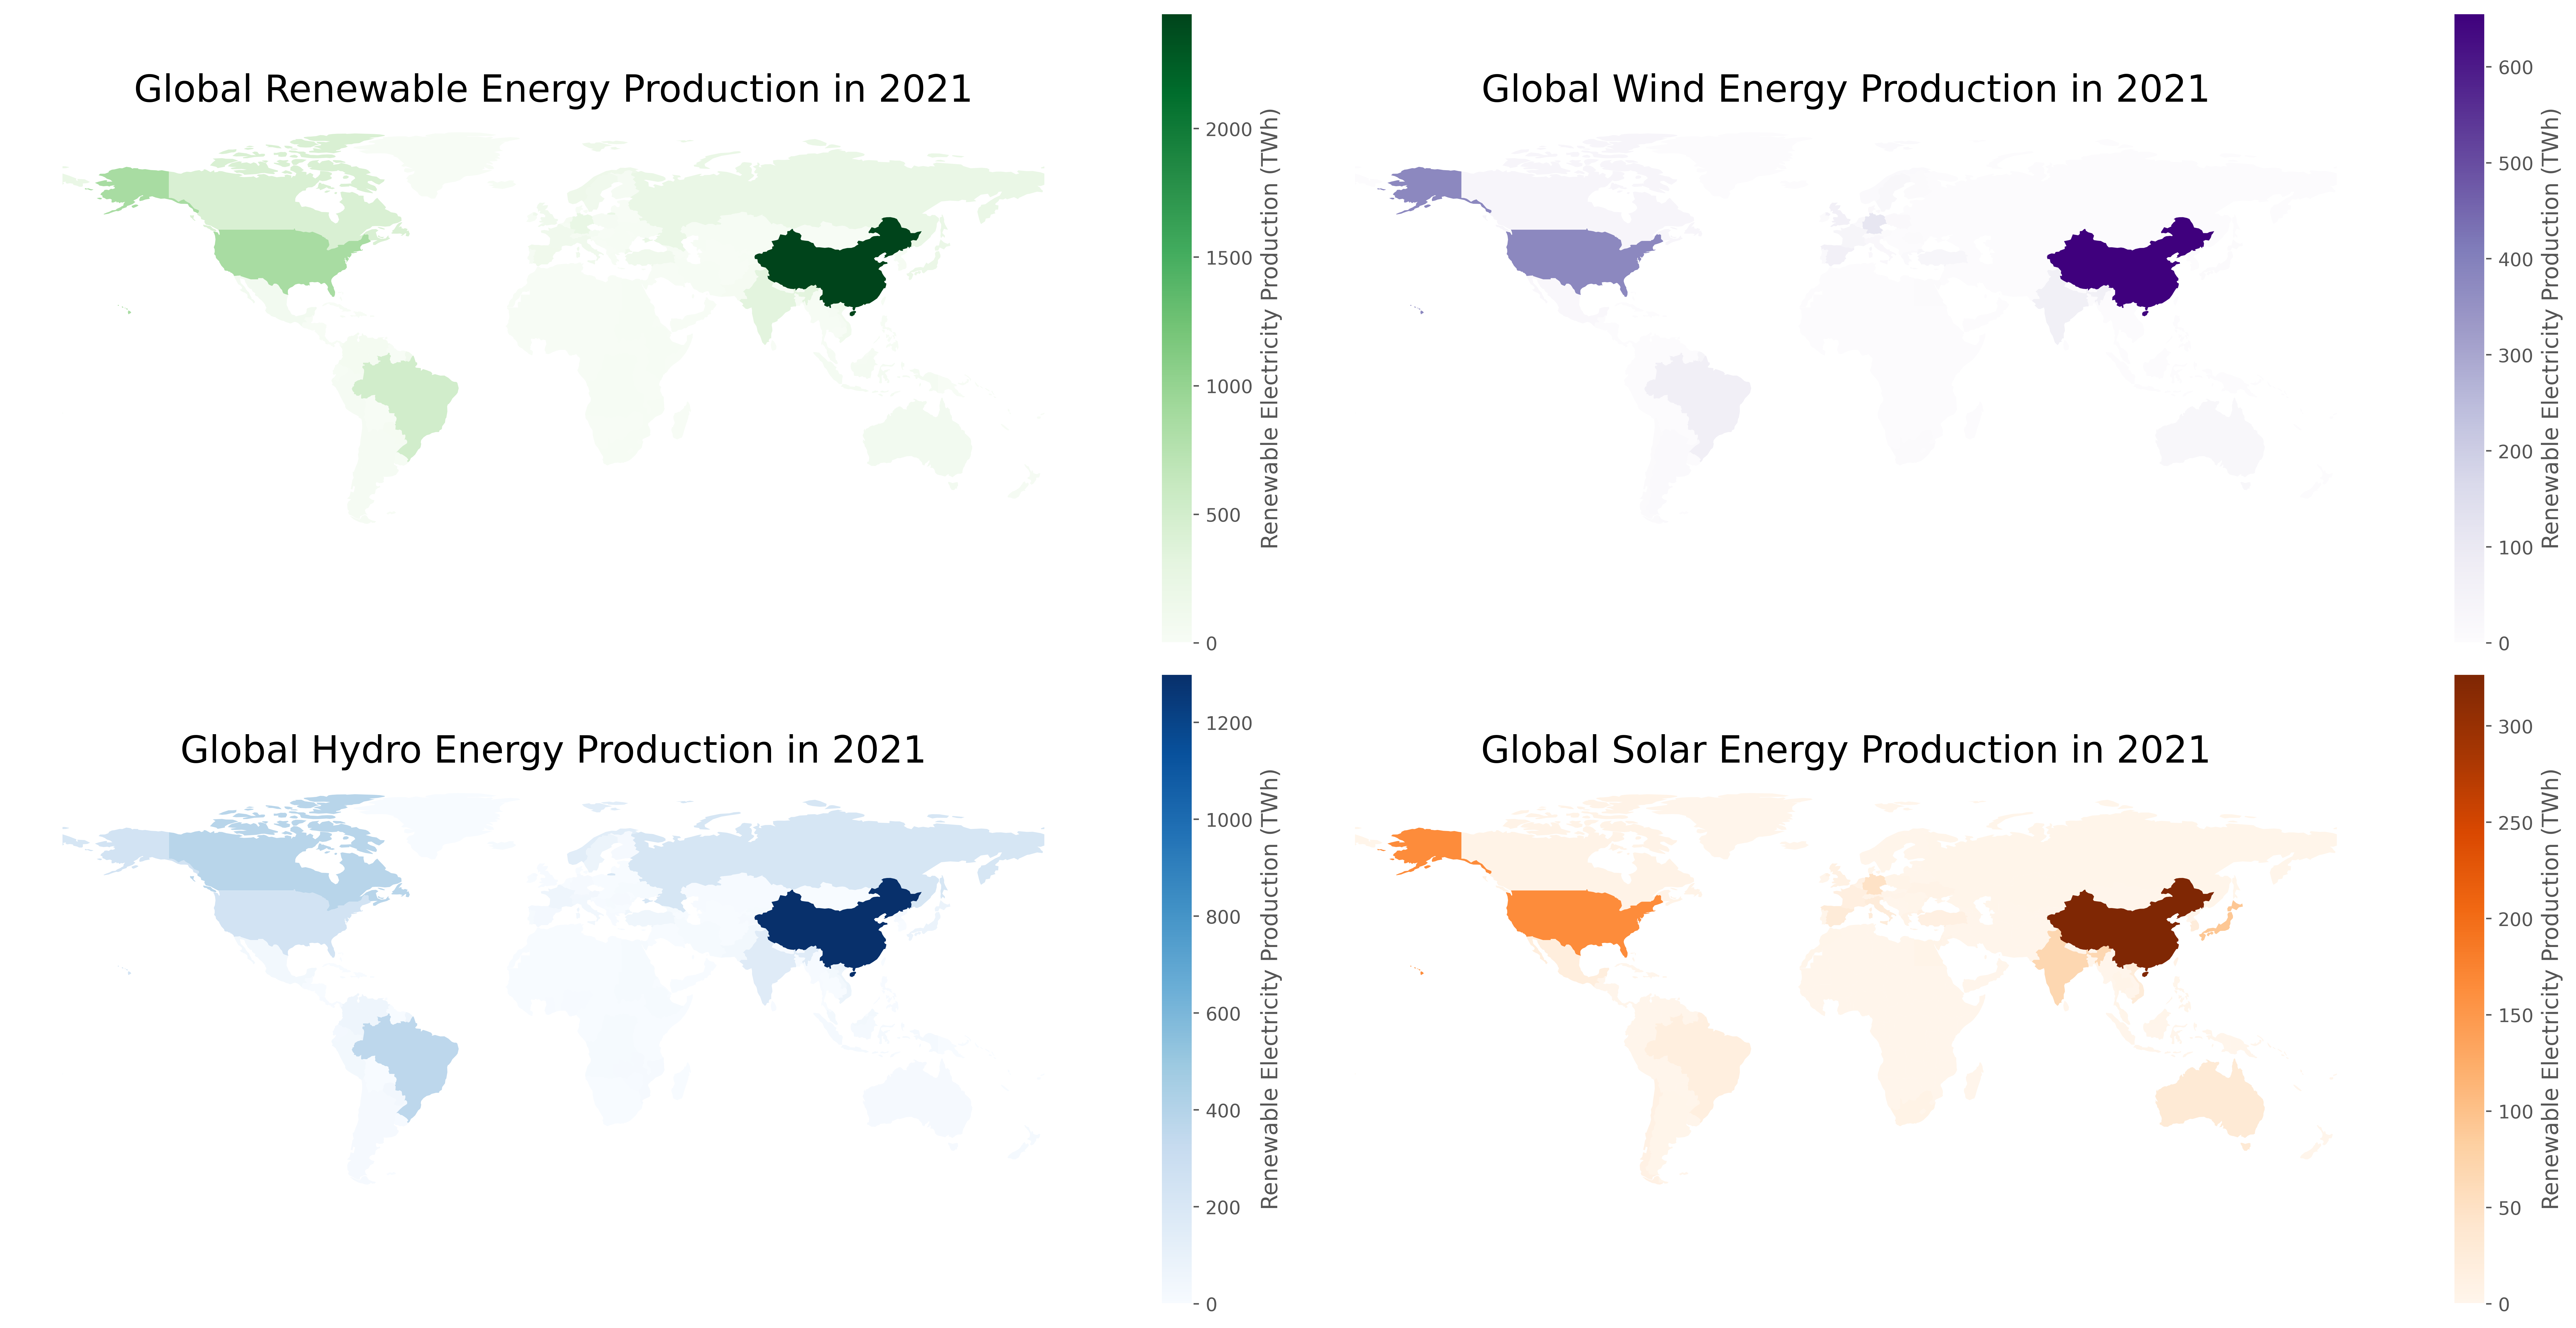

In [193]:
# 2. Global map with color scale as energy production
# world = gpd.read_file(geodatasets.get_path('naturalearth.land'))
world = gpd.read_file("ne_110m_admin_0_countries/ne_110m_admin_0_countries.dbf")
# data processing
world.rename(columns={"ADMIN": "country"}, inplace=True)
# replace country name to fit the other dataset
world.country = world.country.replace(
    ["United States of America", "Democratic Republic of the Congo", "Republic of the Congo", "United Republic of Tanzania", "The Bahamas", "Czechia", "eSwatini", "Republic of Serbia"], 
    ["United States", "Democratic Republic of Congo", "Congo", "Tanzania", "Bahamas", "Czechoslovakia", "Eswatini", "Serbia"]
    )

latest_year = recent_data['year'].max() - pd.Timedelta(days=365*2)
latest_data = recent_data[recent_data['year'] == latest_year]
world = world.merge(latest_data, on=['country'])


fig, ax = plt.subplots(2, 2, figsize=(20, 10), dpi=500)
world.plot(column='renewables_electricity', ax=ax[0, 0], legend=True,
           legend_kwds={'label': 'Renewable Electricity Production (TWh)'},
           cmap='Greens', missing_kwds={'color': 'lightgrey'})
ax[0, 0].set_title(f'Global Renewable Energy Production in {latest_year.year}', fontsize=20)
ax[0, 0].axis('off')
# plt.savefig('global_map.png', dpi=300, bbox_inches='tight')
# plt.show()

# fig, ax = plt.subplots(1, 2, figsize=(20, 10), dpi=300)
world.plot(column='hydro_electricity', ax=ax[1, 0], legend=True,
           legend_kwds={'label': 'Renewable Electricity Production (TWh)'},
           cmap='Blues', missing_kwds={'color': 'lightgrey'})
ax[1, 0].set_title(f'Global Hydro Energy Production in {latest_year.year}', fontsize=20)
ax[1, 0].axis('off')

world.plot(column='wind_electricity', ax=ax[0,1], legend=True,
           legend_kwds={'label': 'Renewable Electricity Production (TWh)'},
           cmap='Purples', missing_kwds={'color': 'lightgrey'})
ax[0, 1].set_title(f'Global Wind Energy Production in {latest_year.year}', fontsize=20)
ax[0, 1].axis('off')

world.plot(column='solar_electricity', ax=ax[1,1], legend=True,
           legend_kwds={'label': 'Renewable Electricity Production (TWh)'},
           cmap='Oranges', missing_kwds={'color': 'lightgrey'})
ax[1,1].set_title(f'Global Solar Energy Production in {latest_year.year}', fontsize=20)
ax[1,1].axis('off')
plt.savefig('global_map.png', dpi=300, bbox_inches='tight')
fig.tight_layout()
plt.tight_layout()
plt.show()


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

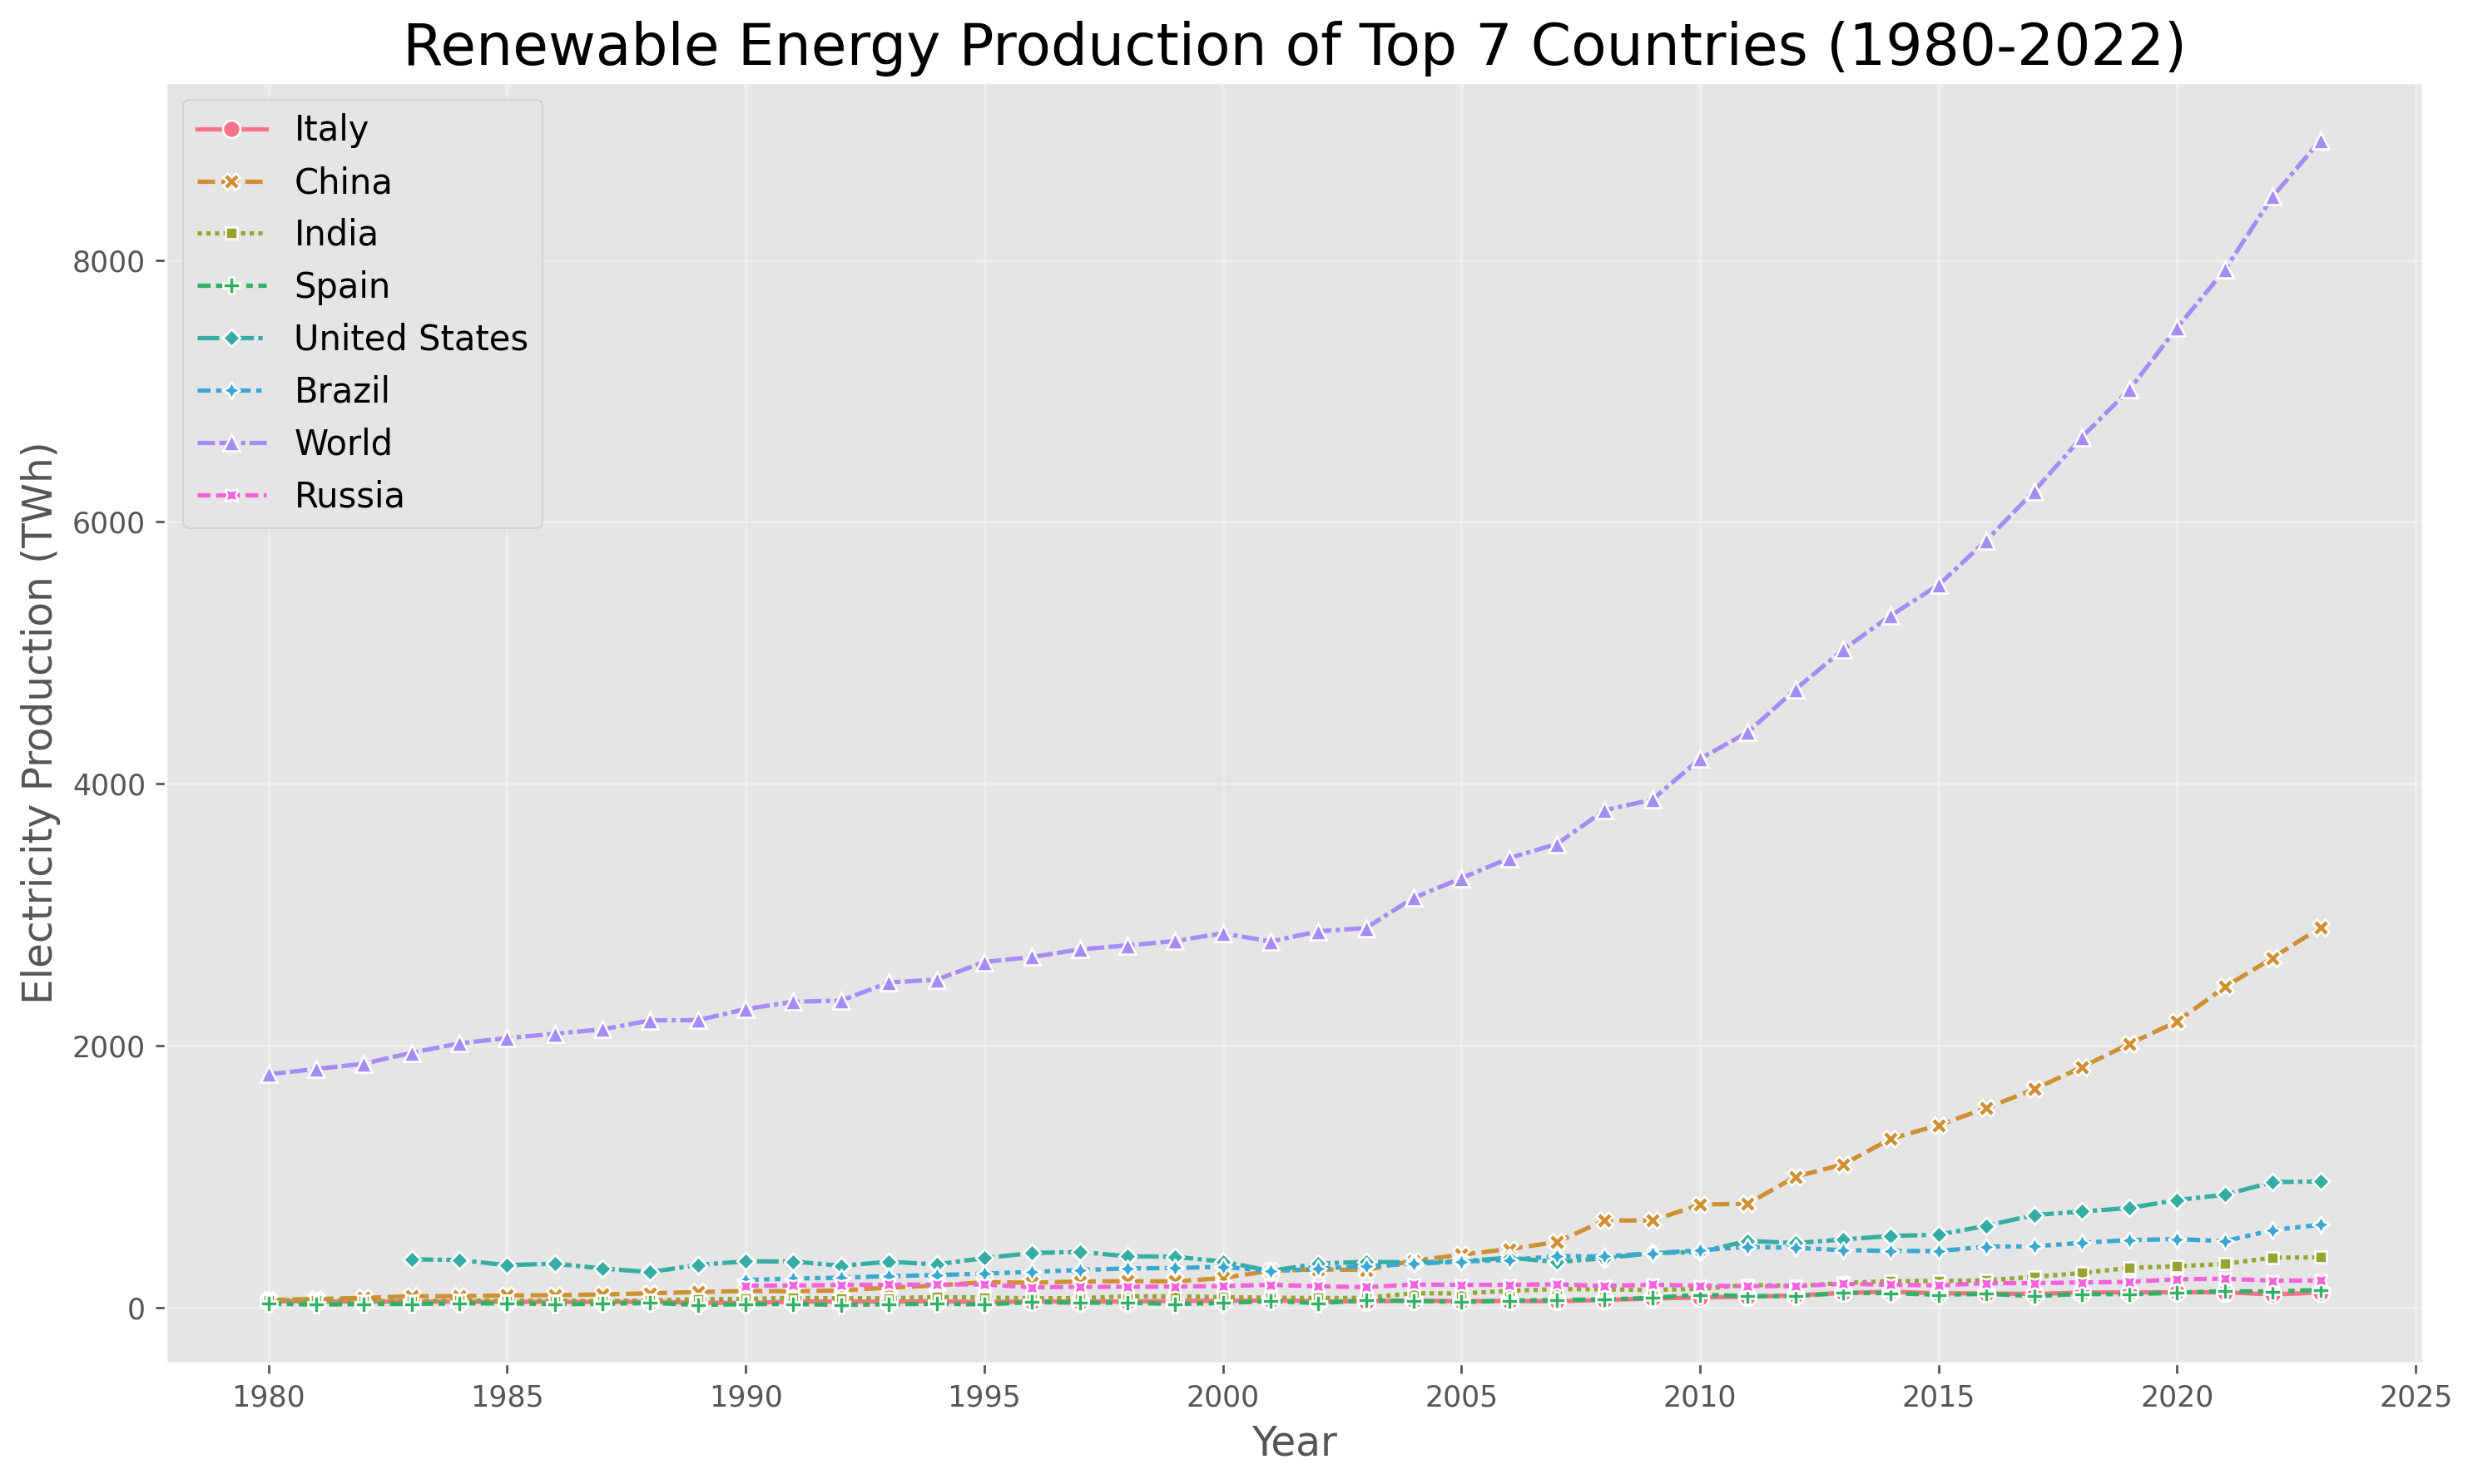

Analysis complete. Plots have been saved as PNG files.


In [161]:
# 4. Compare the 7 most productive countries production over time (from 1980)
top_countries = recent_data.groupby('country')['renewables_electricity'].mean().nlargest(7).index.tolist()
top_countries = ['World', 'United States', 'China', 'Russia', 'Brazil', 'India', 'Italy', 'Spain']
# historical_data = df[df['year'].dt.year >= 1980][renewable_cols]
top_countries_data = historical_data[historical_data['country'].isin(top_countries)]

plt.figure(figsize=(14, 8), dpi=250)
# for country in top_countries:
#     country_data = top_countries_data[top_countries_data['country'] == country]
#     sns.lineplot(x='year', y='renewables_electricity', data=country_data, label=country, markers=True, dashes=False, linewidth=2.5, alpha=1)

sns.lineplot(data=top_countries_data, x='year', y='renewables_electricity', style='country', hue='country', markers=True )

plt.title('Renewable Energy Production of Top 7 Countries (1980-2022)', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Electricity Production (TWh)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('top_countries_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Analysis complete. Plots have been saved as PNG files.")

In [194]:
world = gpd.read_file("ne_110m_admin_0_countries/ne_110m_admin_0_countries.dbf")
world.rename(columns={"ADMIN": "country"}, inplace=True)
# replace country name to fit the other dataset
world.country = world.country.replace(
    ["United States of America", "Democratic Republic of the Congo", "Republic of the Congo", "United Republic of Tanzania", "The Bahamas", "Czechia", "eSwatini", "Republic of Serbia"], 
    ["United States", "Democratic Republic of Congo", "Congo", "Tanzania", "Bahamas", "Czechoslovakia", "Eswatini", "Serbia"]
    )
# world.country = world.country.str.replace("Democratic Republic of the Congo", 'Democratic Republic of Congo')
# (sorted(world.country.unique()))

In [204]:
world.ADM0_A3

0      FJI
1      TZA
2      SAH
3      CAN
4      USA
      ... 
172    SRB
173    MNE
174    KOS
175    TTO
176    SDS
Name: ADM0_A3, Length: 177, dtype: object

In [205]:
# set(sorted(df.country.unique())) - set(world.country.unique()), set(world.country.unique())
world[["ADM0_A3","country"]].to_dict()

{'ADM0_A3': {0: 'FJI',
  1: 'TZA',
  2: 'SAH',
  3: 'CAN',
  4: 'USA',
  5: 'KAZ',
  6: 'UZB',
  7: 'PNG',
  8: 'IDN',
  9: 'ARG',
  10: 'CHL',
  11: 'COD',
  12: 'SOM',
  13: 'KEN',
  14: 'SDN',
  15: 'TCD',
  16: 'HTI',
  17: 'DOM',
  18: 'RUS',
  19: 'BHS',
  20: 'FLK',
  21: 'NOR',
  22: 'GRL',
  23: 'ATF',
  24: 'TLS',
  25: 'ZAF',
  26: 'LSO',
  27: 'MEX',
  28: 'URY',
  29: 'BRA',
  30: 'BOL',
  31: 'PER',
  32: 'COL',
  33: 'PAN',
  34: 'CRI',
  35: 'NIC',
  36: 'HND',
  37: 'SLV',
  38: 'GTM',
  39: 'BLZ',
  40: 'VEN',
  41: 'GUY',
  42: 'SUR',
  43: 'FRA',
  44: 'ECU',
  45: 'PRI',
  46: 'JAM',
  47: 'CUB',
  48: 'ZWE',
  49: 'BWA',
  50: 'NAM',
  51: 'SEN',
  52: 'MLI',
  53: 'MRT',
  54: 'BEN',
  55: 'NER',
  56: 'NGA',
  57: 'CMR',
  58: 'TGO',
  59: 'GHA',
  60: 'CIV',
  61: 'GIN',
  62: 'GNB',
  63: 'LBR',
  64: 'SLE',
  65: 'BFA',
  66: 'CAF',
  67: 'COG',
  68: 'GAB',
  69: 'GNQ',
  70: 'ZMB',
  71: 'MWI',
  72: 'MOZ',
  73: 'SWZ',
  74: 'AGO',
  75: 'BDI',
  76: 'ISR'

<Axes: >

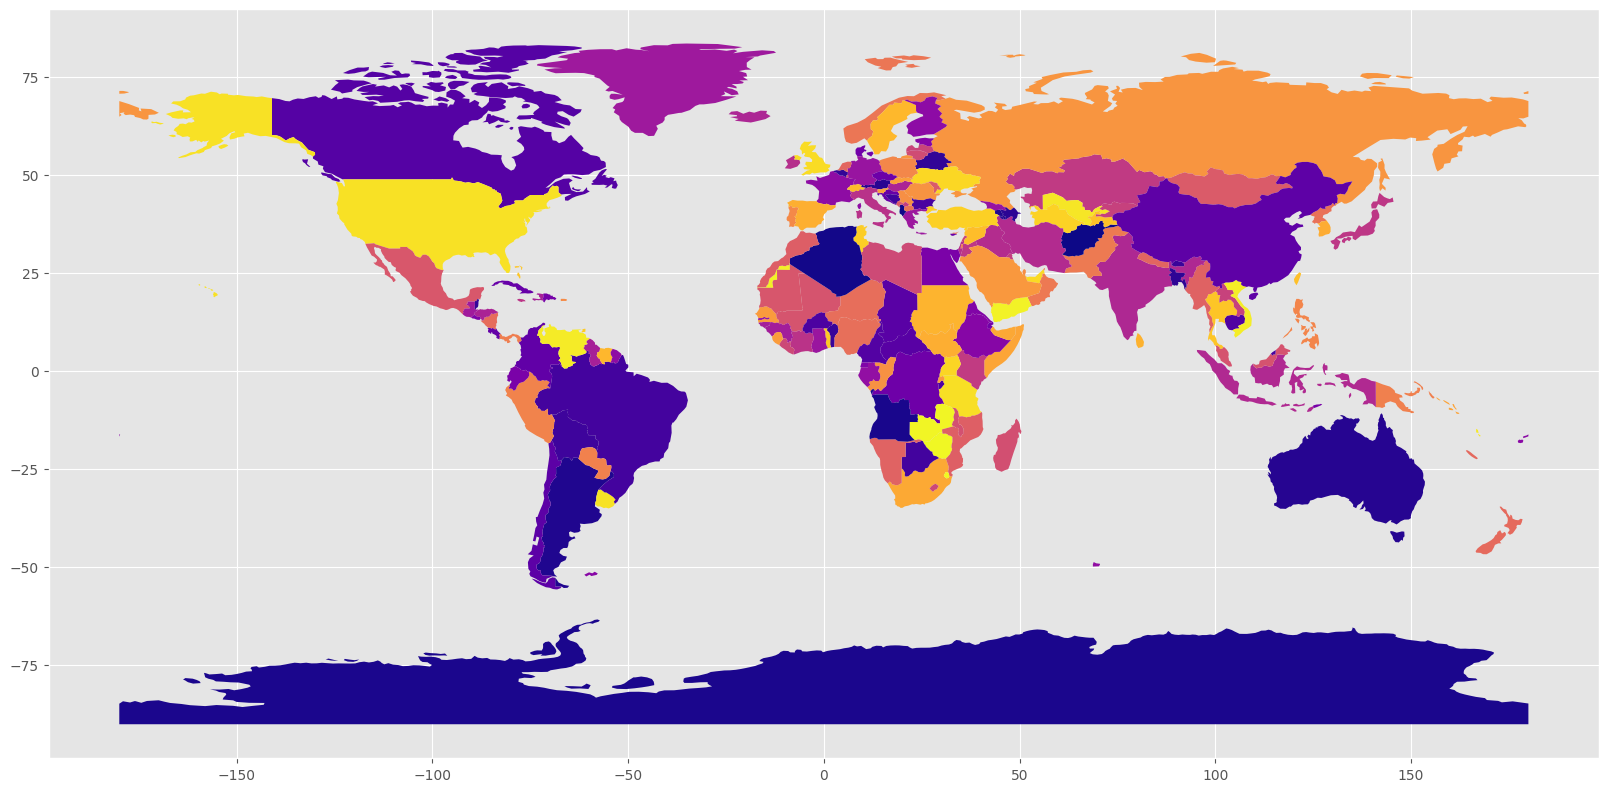

In [166]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
world = gpd.read_file("ne_110m_admin_0_countries/ne_110m_admin_0_countries.dbf")
world.plot(cmap='plasma', ax=ax, column='ADMIN')